<a href="https://colab.research.google.com/github/akhildesigns07/DeepLearning/blob/main/Task3_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

# Load CIFAR-10 dataset
(X_train, y_train), (X_test, y_test) = keras.datasets.cifar10.load_data()

# Normalize the images
X_train = X_train / 255.0
X_test = X_test / 255.0

# Convert labels to one-hot encoding
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

# Check the shape of the data
print(f"Train shape: {X_train.shape}, Test shape: {X_test.shape}")

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 12s 0us/step
Train shape: (50000, 32, 32, 3), Test shape: (10000, 32, 32, 3)


In [2]:
def build_dnn(activation='elu', batch_norm=False):
    model = keras.Sequential()
    model.add(layers.Flatten(input_shape=(32, 32, 3)))  # Flatten input images

    # Add 20 hidden layers with He initialization
    for _ in range(20):
        layer = layers.Dense(100, kernel_initializer='he_normal')
        if batch_norm:
            model.add(layer)
            model.add(layers.BatchNormalization())  # Add Batch Normalization if enabled
        else:
            model.add(layer)
        model.add(layers.Activation(activation))

    # Add the output layer
    model.add(layers.Dense(10, activation='softmax'))
    return model

In [3]:
def train_model(model, learning_rate=1e-3):
    model.compile(optimizer=keras.optimizers.Nadam(learning_rate=learning_rate),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    # Set up early stopping
    early_stopping = EarlyStopping(patience=5, restore_best_weights=True)

    # Train the model
    history = model.fit(X_train, y_train,
                        validation_split=0.1,
                        epochs=50,
                        batch_size=64,
                        callbacks=[early_stopping],
                        verbose=1)
    return history

# Build and train the model without Batch Normalization
model_without_bn = build_dnn(batch_norm=False)
history_without_bn = train_model(model_without_bn)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
704/704 ━━━━━━━━━━━━━━━━━━━━ 19s 17ms/step - accuracy: 0.2058 - loss: 2.3647 - val_accuracy: 0.3272 - val_loss: 1.9042
Epoch 2/50
704/704 ━━━━━━━━━━━━━━━━━━━━ 19s 15ms/step - accuracy: 0.3501 - loss: 1.7926 - val_accuracy: 0.3462 - val_loss: 1.8403
Epoch 3/50
704/704 ━━━━━━━━━━━━━━━━━━━━ 10s 15ms/step - accuracy: 0.3777 - loss: 1.7186 - val_accuracy: 0.3176 - val_loss: 1.9360
Epoch 4/50
704/704 ━━━━━━━━━━━━━━━━━━━━ 21s 16ms/step - accuracy: 0.4047 - loss: 1.6549 - val_accuracy: 0.4002 - val_loss: 1.6895
Epoch 5/50
704/704 ━━━━━━━━━━━━━━━━━━━━ 11s 16ms/step - accuracy: 0.4279 - loss: 1.5990 - val_accuracy: 0.3842 - val_loss: 1.8038
Epoch 6/50
704/704 ━━━━━━━━━━━━━━━━━━━━ 11s 15ms/step - accuracy: 0.4335 - loss: 1.5835 - val_accuracy: 0.4254 - val_loss: 1.6299
Epoch 7/50
704/704 ━━━━━━━━━━━━━━━━━━━━ 21s 16ms/step - accuracy: 0.4481 - loss: 1.5414 - val_accuracy: 0.4058 - val_loss: 1.6770
Epoch 8/50
704/704 ━━━━━━━━━━━━━━━━━━━━ 20s 16ms/step - accuracy: 0.4579 - loss: 1.5224 - 

Epoch 1/50
704/704 ━━━━━━━━━━━━━━━━━━━━ 40s 26ms/step - accuracy: 0.3239 - loss: 1.9097 - val_accuracy: 0.3718 - val_loss: 1.8045
Epoch 2/50
704/704 ━━━━━━━━━━━━━━━━━━━━ 21s 26ms/step - accuracy: 0.4204 - loss: 1.6275 - val_accuracy: 0.3874 - val_loss: 1.7101
Epoch 3/50
704/704 ━━━━━━━━━━━━━━━━━━━━ 19s 24ms/step - accuracy: 0.4485 - loss: 1.5450 - val_accuracy: 0.3434 - val_loss: 1.9211
Epoch 4/50
704/704 ━━━━━━━━━━━━━━━━━━━━ 22s 26ms/step - accuracy: 0.4701 - loss: 1.4733 - val_accuracy: 0.4050 - val_loss: 1.7001
Epoch 5/50
704/704 ━━━━━━━━━━━━━━━━━━━━ 19s 24ms/step - accuracy: 0.4950 - loss: 1.4262 - val_accuracy: 0.4342 - val_loss: 1.6003
Epoch 6/50
704/704 ━━━━━━━━━━━━━━━━━━━━ 22s 26ms/step - accuracy: 0.5086 - loss: 1.3875 - val_accuracy: 0.4228 - val_loss: 1.6434
Epoch 7/50
704/704 ━━━━━━━━━━━━━━━━━━━━ 19s 24ms/step - accuracy: 0.5149 - loss: 1.3781 - val_accuracy: 0.4292 - val_loss: 1.6730
Epoch 8/50
704/704 ━━━━━━━━━━━━━━━━━━━━ 17s 24ms/step - accuracy: 0.5385 - loss: 1.3097 - 

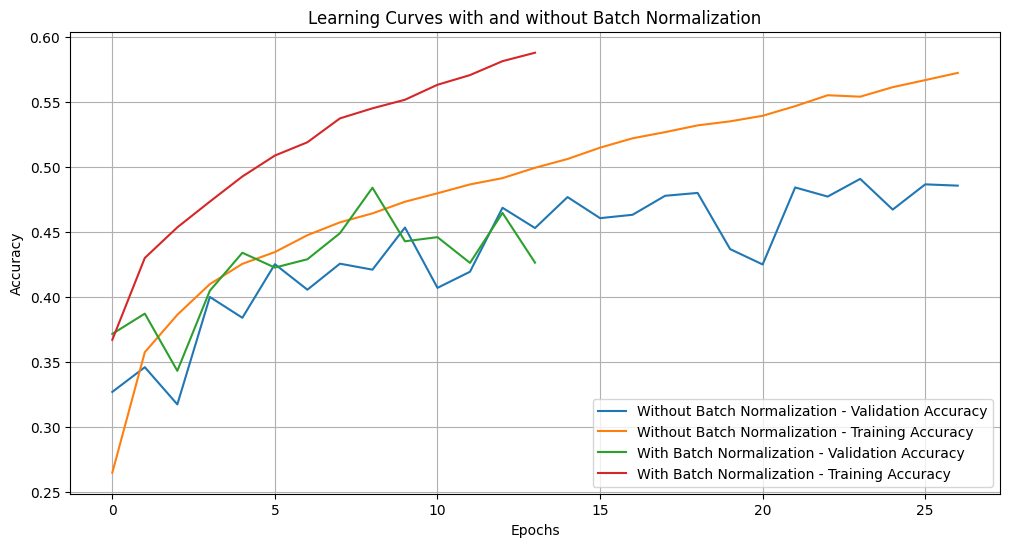

In [4]:
# Build and train the model with Batch Normalization
model_with_bn = build_dnn(batch_norm=True)
history_with_bn = train_model(model_with_bn)

# Plot the learning curves
plt.figure(figsize=(12, 6))

# Without Batch Normalization
plt.plot(history_without_bn.history['val_accuracy'], label='Without Batch Normalization - Validation Accuracy')
plt.plot(history_without_bn.history['accuracy'], label='Without Batch Normalization - Training Accuracy')

# With Batch Normalization
plt.plot(history_with_bn.history['val_accuracy'], label='With Batch Normalization - Validation Accuracy')
plt.plot(history_with_bn.history['accuracy'], label='With Batch Normalization - Training Accuracy')

plt.title('Learning Curves with and without Batch Normalization')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()
plt.show()


In [5]:
# Function to train with different optimizers
import tensorflow as tf  # Add this line
from tensorflow import keras

def compare_optimizers(optimizer, learning_rate=1e-3):
    model = build_dnn(batch_norm=True)
    model.compile(optimizer=optimizer,
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    early_stopping = EarlyStopping(patience=5, restore_best_weights=True)
    history = model.fit(X_train, y_train,
                        validation_split=0.1,
                        epochs=50,
                        batch_size=64,
                        callbacks=[early_stopping],
                        verbose=1)
    return history

# Test different optimizers
optimizers = {
    'SGD': keras.optimizers.SGD(learning_rate=1e-2),
    'Momentum': keras.optimizers.SGD(learning_rate=1e-2, momentum=0.9),
    'Nesterov': keras.optimizers.SGD(learning_rate=1e-2, momentum=0.9, nesterov=True),
    'AdaGrad': keras.optimizers.Adagrad(learning_rate=1e-2),
    'RMSProp': keras.optimizers.RMSprop(learning_rate=1e-3),
    'Adam': keras.optimizers.Adam(learning_rate=1e-3),
    'Nadam': keras.optimizers.Nadam(learning_rate=1e-3)
}

results = {}
for name, opt in optimizers.items():
    print(f"\nTraining with {name} optimizer:")
    history = compare_optimizers(opt)
    results[name] = history


Training with SGD optimizer:
Epoch 1/50
704/704 ━━━━━━━━━━━━━━━━━━━━ 17s 18ms/step - accuracy: 0.2609 - loss: 2.0802 - val_accuracy: 0.2822 - val_loss: 2.0029
Epoch 2/50
704/704 ━━━━━━━━━━━━━━━━━━━━ 19s 15ms/step - accuracy: 0.3938 - loss: 1.6975 - val_accuracy: 0.3422 - val_loss: 1.8573
Epoch 3/50
704/704 ━━━━━━━━━━━━━━━━━━━━ 11s 16ms/step - accuracy: 0.4327 - loss: 1.5948 - val_accuracy: 0.3594 - val_loss: 1.8933
Epoch 4/50
704/704 ━━━━━━━━━━━━━━━━━━━━ 12s 17ms/step - accuracy: 0.4554 - loss: 1.5374 - val_accuracy: 0.3840 - val_loss: 1.7349
Epoch 5/50
704/704 ━━━━━━━━━━━━━━━━━━━━ 21s 17ms/step - accuracy: 0.4670 - loss: 1.4976 - val_accuracy: 0.2902 - val_loss: 2.0551
Epoch 6/50
704/704 ━━━━━━━━━━━━━━━━━━━━ 12s 16ms/step - accuracy: 0.4773 - loss: 1.4649 - val_accuracy: 0.2578 - val_loss: 2.2670
Epoch 7/50
704/704 ━━━━━━━━━━━━━━━━━━━━ 21s 17ms/step - accuracy: 0.4899 - loss: 1.4362 - val_accuracy: 0.2850 - val_loss: 2.0579
Epoch 8/50
704/704 ━━━━━━━━━━━━━━━━━━━━ 21s 17ms/step - accu